### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
data.shape[0]

12684

12684 rows

### 2. Investigate the dataset for missing or problematic data.

In [12]:
pd.Series({c: data[c].unique() for c in data})

destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $499

The 'toCoupon_GEQ5min' field is irrelevant, as all rows have a value of 1.

In [14]:
data["maritalStatus"].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [15]:
data["coupon"].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [16]:
data["education"].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [17]:
data["occupation"].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [18]:
data["income"].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [19]:
data["car"].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

'car' data is very odd.  No need to modify it.

In [21]:
data["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [22]:
data["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

The fact that we have exactly 21 or 22 for each of these very disparate categories seems to indicate some form of data slicing occurred to create this data set.  Combined with the odd buckets for temperature and age, I presume that someone made data slices of a much larger data set to give us something to work with, while not providing access to the full data collected.  I would not feel confident in drawing any conclusions from examination of this data set without more information on how it was sourced and created.  We will perform the analysis in the context of the class experimentation regardless.

In [24]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [25]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [26]:
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

The age column is quite odd.  The selection of distinct ages such as 21 and 26 without any other 20's would seem to indicate some form of bucketing or preselection of data.  This can't be a random sample given the volume sizes and resulting ages.  Temperature also has only 3 values indicating either bucketing or preselection.  Those can't be actual values.

### 3. Decide what to do about your missing data -- drop, replace, other...

While there are some columns with null values, these do not appear problematic as long as I remain aware that not all rows contain some of the data points.  This will need to be taken into consideration when creating and evaluating data analysis.

### 4. What proportion of the total observations chose to accept the coupon? 



In [31]:
data['Y'].value_counts()[1] / data.shape[0]

0.5684326710816777

57% chose to accept the coupon

### 5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Coupon Type')

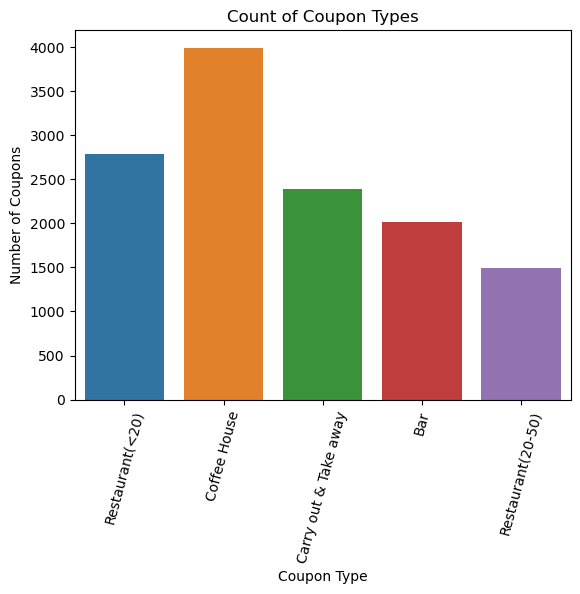

In [34]:
sns.countplot(x="coupon", data=data)
plt.xticks(rotation=75)
plt.title("Count of Coupon Types")
plt.ylabel("Number of Coupons")
plt.xlabel("Coupon Type")

### 6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature')

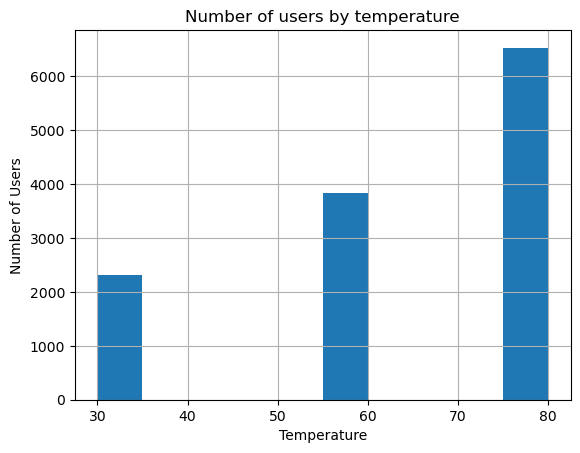

In [36]:
data.hist("temperature")
plt.title("Number of users by temperature")
plt.ylabel("Number of Users")
plt.xlabel("Temperature")

As previously mentioned, the fact that there are only 3 distinct values would indicate that either data was bucketed into these 3 options or data was selected for these three.  Those values can not represent actual temperatures of a random sample of over 12,000 users.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [39]:
bar_coupons=data.loc[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [41]:
bar_coupons['Y'].value_counts()[1] / bar_coupons.shape[0]

0.41001487357461575

41% of those who received bar coupons accepted them.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [44]:
bar_less_3 = bar_coupons.loc[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])].copy()
bar_less_3['Y'].value_counts()[1] / bar_less_3.shape[0]

0.37061769616026713

The acceptance rate for those who went to a bar 3 or fewer times a month was: 37%

Text(0.5, 0, 'Bar visits per month')

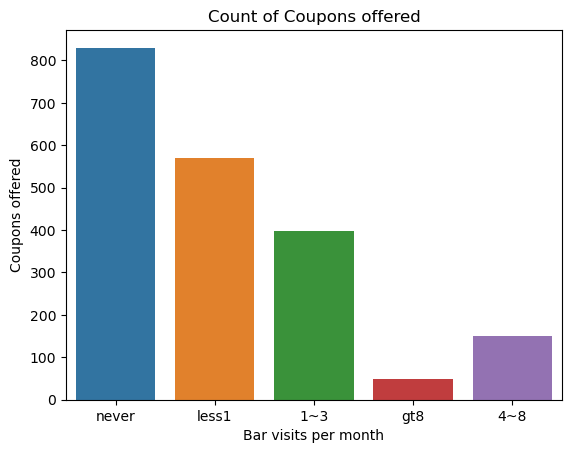

In [46]:
sns.countplot(x="Bar", data=bar_coupons)
plt.title("Count of Coupons offered")
plt.ylabel("Coupons offered")
plt.xlabel("Bar visits per month")

In [47]:
bar_less_3['Bar'] = bar_less_3['Bar'].astype(str)
bar_less_3['Y'] = bar_less_3['Y'].astype(str)

Text(0.5, 0, 'Bar visits per month')

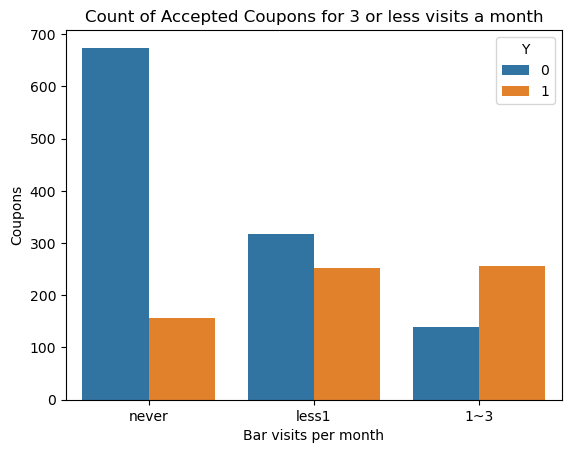

In [48]:
sns.countplot(x="Bar", data=bar_less_3, hue="Y")
plt.title("Count of Accepted Coupons for 3 or less visits a month")
plt.ylabel("Coupons")
plt.xlabel("Bar visits per month")

In [49]:
bar_more_3 = bar_coupons.loc[bar_coupons['Bar'].isin(['gt8', '4~8'])].copy()
bar_more_3['Y'].value_counts()[1] / bar_more_3.shape[0]

0.7688442211055276

The acceptance rate for those who went to a bar more than 3 times a month was: 77%
This appears to be a significant increase over those who went to a bar 3 or fewer times a month.

Note that null values were ignored through the use of specific values.

Text(0.5, 0, 'Bar visits per month')

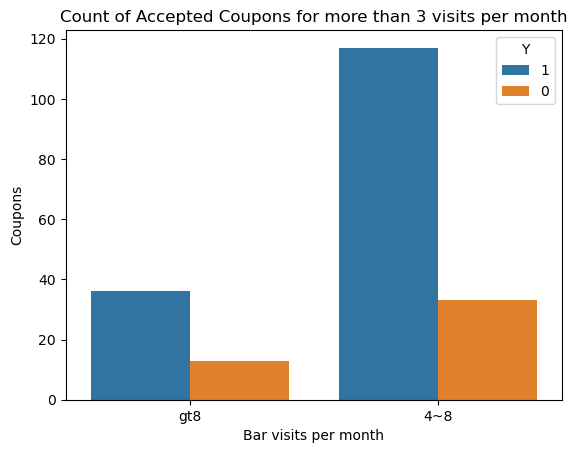

In [52]:
bar_more_3['Bar'] = bar_more_3['Bar'].astype(str)
bar_more_3['Y'] = bar_more_3['Y'].astype(str)
sns.countplot(x="Bar", data=bar_more_3,hue="Y")
plt.title("Count of Accepted Coupons for more than 3 visits per month")
plt.ylabel("Coupons")
plt.xlabel("Bar visits per month")

Not surprising that those who go to bars more frequently would use the coupons significantly more.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [55]:
bar_more_month_over25 = bar_coupons.loc[data['Bar'].isin(['gt8', '4~8','1~3']) & (data['age'].isin([46, 26, 31, 41, '50plus', 36]))].copy()
bar_more_month_over25['Y'].value_counts()[1] / bar_more_month_over25.shape[0]

0.6716417910447762

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 67%

In [57]:
bar_not_more_month_over25 = bar_coupons.loc[bar_coupons['Bar'].isin(['never', 'less1']) | (bar_coupons['age'].isin([21, 'below21']))].copy()
bar_not_more_month_over25['Y'].value_counts()[1] / bar_not_more_month_over25.shape[0]

0.2929078014184397

Acceptance rate for drivers who go to a bar less than once a month or are under the age of 25 (All other drivers) is 29%.  It appears that frequency may be more important than age.

Next graph is just for my own interest.

Text(0.5, 0, 'Bar visits per month')

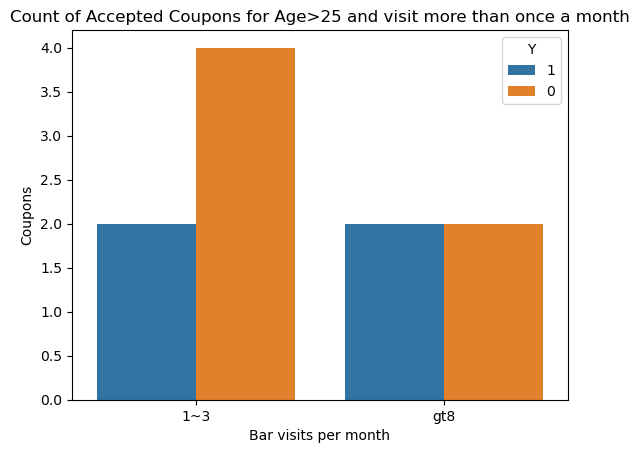

In [60]:
bar_test = bar_coupons.loc[bar_coupons['Bar'].isin(['gt8', '4~8','1~3']) & (bar_coupons['age'].isin([21, 'below21']))].copy()
bar_test['Bar'] = bar_test['Bar'].astype(str)
bar_test['Y'] = bar_test['Y'].astype(str)
sns.countplot(x="Bar", data=bar_test,hue="Y")
plt.title("Count of Accepted Coupons for Age>25 and visit more than once a month")
plt.ylabel("Coupons")
plt.xlabel("Bar visits per month")


This graph confirms that frequency has a large impact.

### Graphs of drivers who go to a bar more than once a month and are over the age of 25 to all others

Text(0.5, 0, 'Bar visits per month')

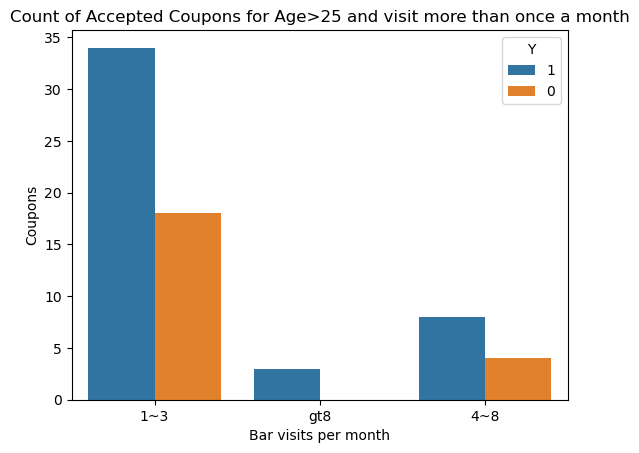

In [63]:
bar_more_month_over25['Bar'] = bar_more_month_over25['Bar'].astype(str)
bar_more_month_over25['Y'] = bar_more_month_over25['Y'].astype(str)
sns.countplot(x="Bar", data=bar_more_month_over25,hue="Y")
plt.title("Count of Accepted Coupons for Age>25 and visit more than once a month")
plt.ylabel("Coupons")
plt.xlabel("Bar visits per month")

This seems to support that frequent visitors to bars use more coupons.

Text(0.5, 0, 'Bar visits per month')

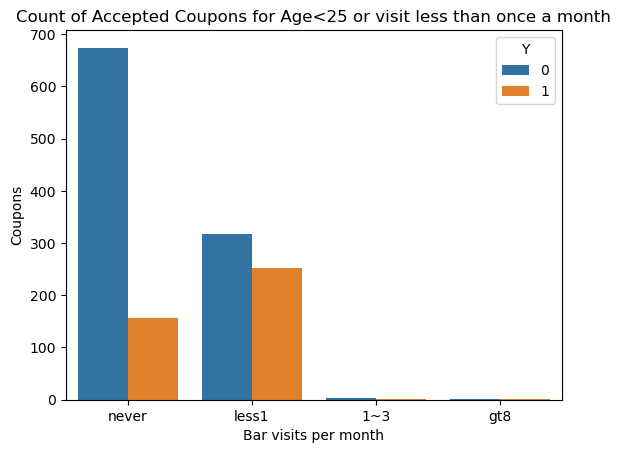

In [65]:
bar_not_more_month_over25['Bar'] = bar_not_more_month_over25['Bar'].astype(str)
bar_not_more_month_over25['Y'] = bar_not_more_month_over25['Y'].astype(str)
sns.countplot(x="Bar", data=bar_not_more_month_over25,hue="Y")
plt.title("Count of Accepted Coupons for Age<25 or visit less than once a month")
plt.ylabel("Coupons")
plt.xlabel("Bar visits per month")

With the younger crowd using the coupons more frequently, this drop in percentage seems to indicate a strong influence of the frequent visitors utilizing coupons.  Frequency seems to have stronger correlation than age.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [68]:
bars_passenger_occupation = bar_coupons.loc[bar_coupons['Bar'].isin(['gt8', '4~8']) & (bar_coupons['passanger'].isin(['Friend(s)', 'Partner'])) & ~(bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))].copy()
bars_passenger_occupation['Y'].value_counts()[1] / bars_passenger_occupation.shape[0]

0.7096774193548387

71% for this grouping is significantly higher than the previous results.  This grouping is for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry

Graphing this we get:

Text(0.5, 0, 'Bar visits per month')

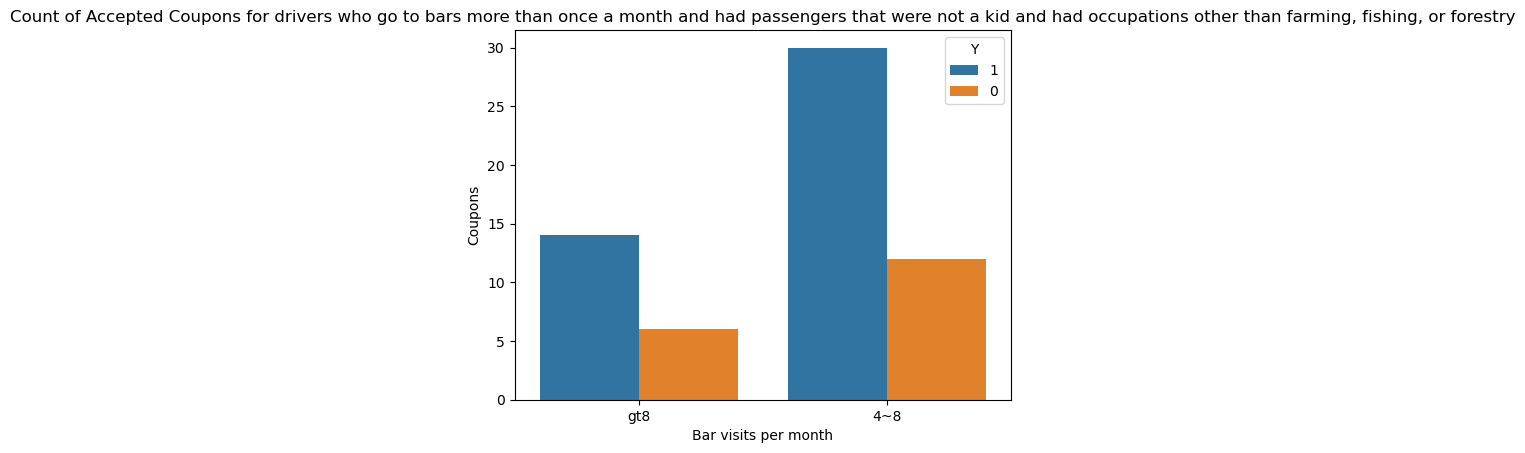

In [70]:
bars_passenger_occupation['Bar'] = bars_passenger_occupation['Bar'].astype(str)
bars_passenger_occupation['Y'] = bars_passenger_occupation['Y'].astype(str)
sns.countplot(x="Bar", data=bars_passenger_occupation,hue="Y", hue_order=["1", "0"])
plt.title("Count of Accepted Coupons for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry")
plt.ylabel("Coupons")
plt.xlabel("Bar visits per month")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Not sure if you want the "or"s all at once or individually, so I will do both.  Since I don't thiunk you wanted them individually, I'll not graph the first set.

In [73]:
freq_pass_notwidow = bar_coupons.loc[bar_coupons['Bar'].isin(['gt8', '4~8']) & (bar_coupons['passanger'].isin(['Friend(s)', 'Partner'])) & (bar_coupons['maritalStatus'].isin(['Unmarried partner', 'Single', 'Married partner', 'Divorced']))]
freq_pass_notwidow['Y'].value_counts()[1] /freq_pass_notwidow.shape[0]

0.7096774193548387

In [74]:
freq_under30 = bar_coupons.loc[bar_coupons['Bar'].isin(['gt8', '4~8']) & bar_coupons['age'].isin([21, 26, "below21"])]
# First, check the unique values in the 'Y' column
unique_values = freq_under30['Y'].unique()

# Then, perform the value count operation
if 1 in unique_values:
    ratio = freq_under30['Y'].value_counts()[1] / freq_under30.shape[0]
    print(ratio)
else:
    print("Value '1' not found in the 'Y' column")
    # Handle the case where '1' is not present in the 'Y' column

0.5


In [75]:
rest_poor = bar_coupons.loc[bar_coupons['RestaurantLessThan20'].isin(['gt8', '4~8']) & (bar_coupons['income'].isin(["$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500"]))]
rest_poor['Y'].value_counts()[1] /rest_poor.shape[0]

0.45348837209302323

Now for what I think you wanted, all conditions at once.

In [77]:
alltogether = bar_coupons.loc[
    (
        (bar_coupons['Bar'].isin(['gt8', '4~8']) & data['passanger'].isin(['Friend(s)', 'Partner']) & data['maritalStatus'].isin(['Unmarried partner', 'Single', 'Married partner', 'Divorced']))
        |
        (bar_coupons['Bar'].isin(['gt8', '4~8']) & data['age'].isin([21, 26, "below21"]))
        |
        (bar_coupons['RestaurantLessThan20'].isin(['gt8', '4~8']) & data['income'].isin(["$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500"]))
    )
].copy()
alltogether['Y'].value_counts()[1] / alltogether.shape[0]

0.4793814432989691

Text(0.5, 0, 'Bar visits per month')

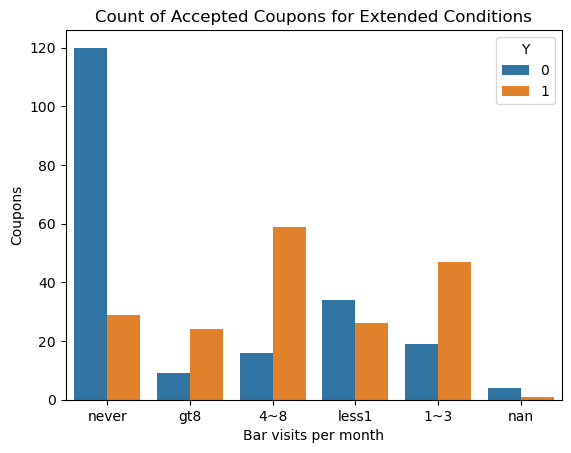

In [78]:
alltogether['Bar'] = alltogether['Bar'].astype(str)
alltogether['Y'] = alltogether['Y'].astype(str)
sns.countplot(x="Bar", data=alltogether,hue="Y")
plt.title("Count of Accepted Coupons for Extended Conditions")
plt.ylabel("Coupons")
plt.xlabel("Bar visits per month")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Conslusions

It appears the most significant factor is people who go to bars more than once a month. However, those who go more than 8 times a month don't seem to need the coupons as much.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigation on the impact of income

Text(0.5, -46.77012523387304, 'Income')

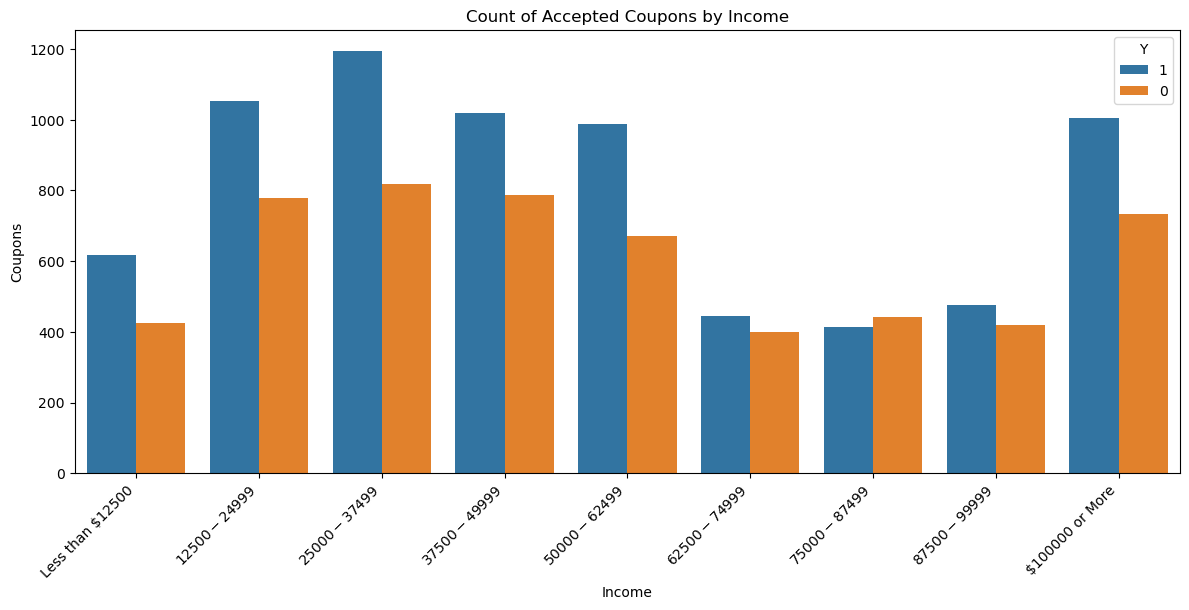

In [84]:
income=data.copy()
income['Bar'] = income['Bar'].astype(str)
income['Y'] = income['Y'].astype(str)
income_order = ['Less than $12500', '$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="income", data=income, hue="Y", order=income_order)
ax.set_xticklabels(income_order)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Count of Accepted Coupons by Income")
plt.ylabel("Coupons")
plt.xlabel("Income")

How interesting!  As might be expected, those with higher incomes feel less of the need to use a coupon.  This changes however for the highest income group.  This indicates that wealthy people take advantage of savings opportunities more than those who are well off and feel they don't need the financial assitance.  Think of the wealthy miser.

Now to examine how gender affects these results:

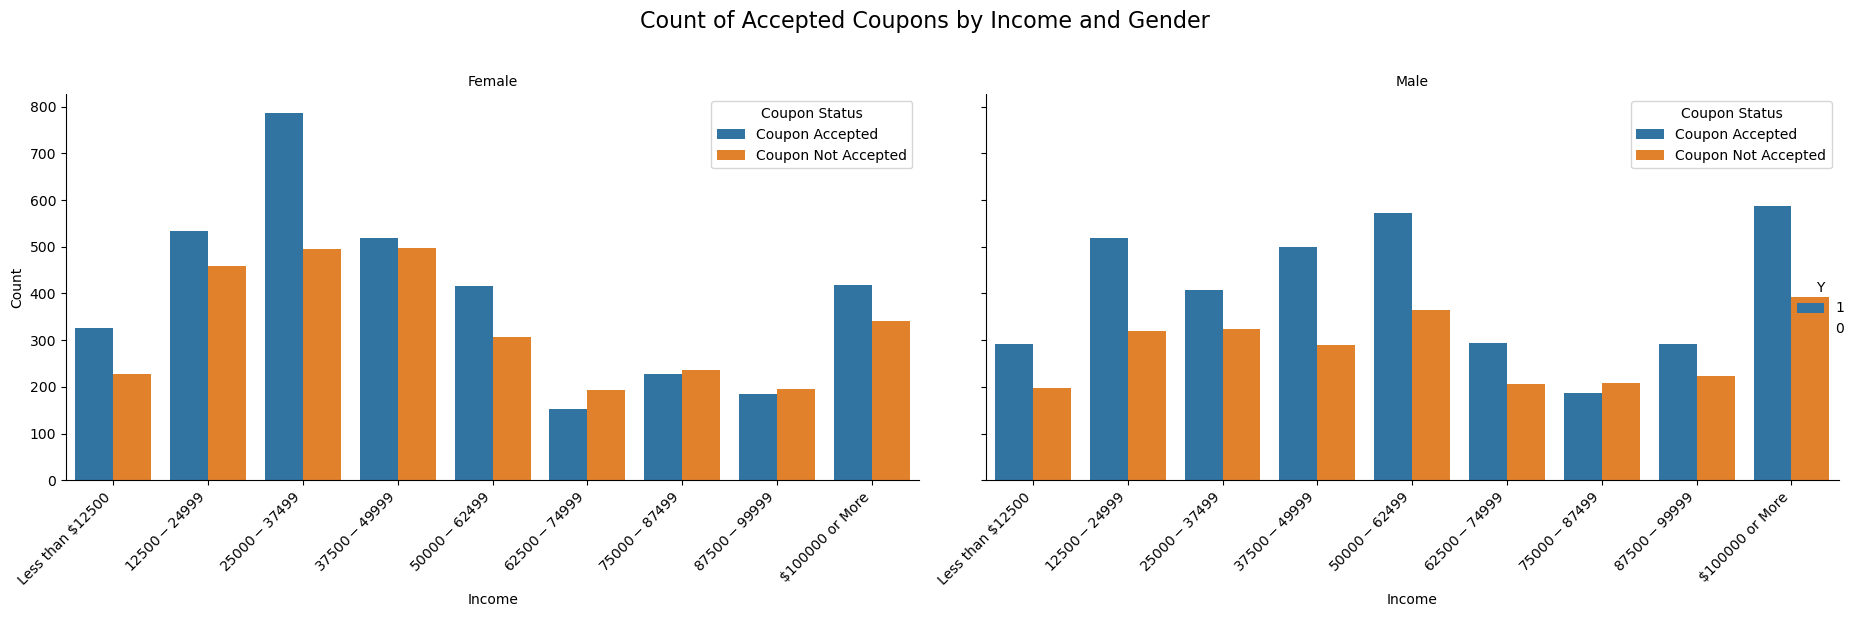

In [87]:
# Create a custom palette and labels for Y
color_palette = {"0": "#ff7f0e", "1": "#1f77b4"}
y_labels = {"1": "Coupon Accepted", "0": "Coupon Not Accepted"}

g = sns.catplot(
    data=income, 
    x="income", 
    hue="Y",
    col="gender",
    kind="count",
    height=6, 
    aspect=1.5,
    order=income_order,
    palette=color_palette,
    hue_order=["1", "0"]
)

g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle("Count of Accepted Coupons by Income and Gender", y=1.02, fontsize=16)
g.set_axis_labels("Income", "Count")

# Improve the legends
for ax in g.axes.flat:
    ax.legend(title="Coupon Status", labels=[y_labels["1"], y_labels["0"]])

# Adjust the subplot titles
g.set_titles("{col_name}")

# Adjust layout to prevent cutting off labels
plt.tight_layout()

Text(0.5, 0, 'Income')

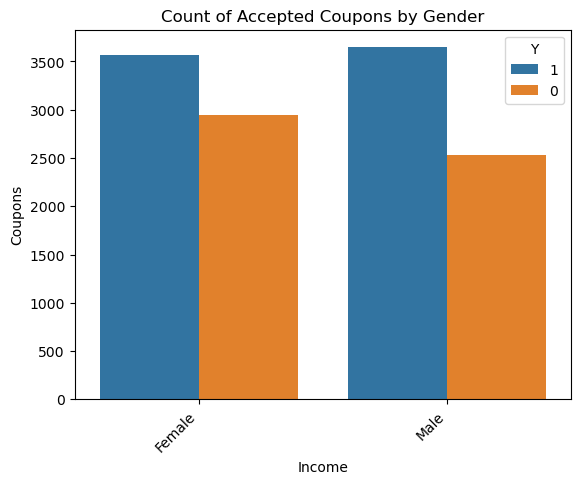

In [88]:
gender=data.copy()
gender['Bar'] = gender['Bar'].astype(str)
gender['Y'] = gender['Y'].astype(str)
ax = sns.countplot(x="gender", data=gender, hue="Y")
plt.xticks(rotation=45, ha='right')
plt.title("Count of Accepted Coupons by Gender")
plt.ylabel("Coupons")
plt.xlabel("Income")


Gender has the expected impact with males accepting the coupon more than females.  However, I don't notice any other correlation impacted by income other than a spike in women in the $25000-$37499 category, which is likely due to age which we know has a strong influence.  The $62500-$74999 acceptance grouping for men is a little higher than may have been expected.

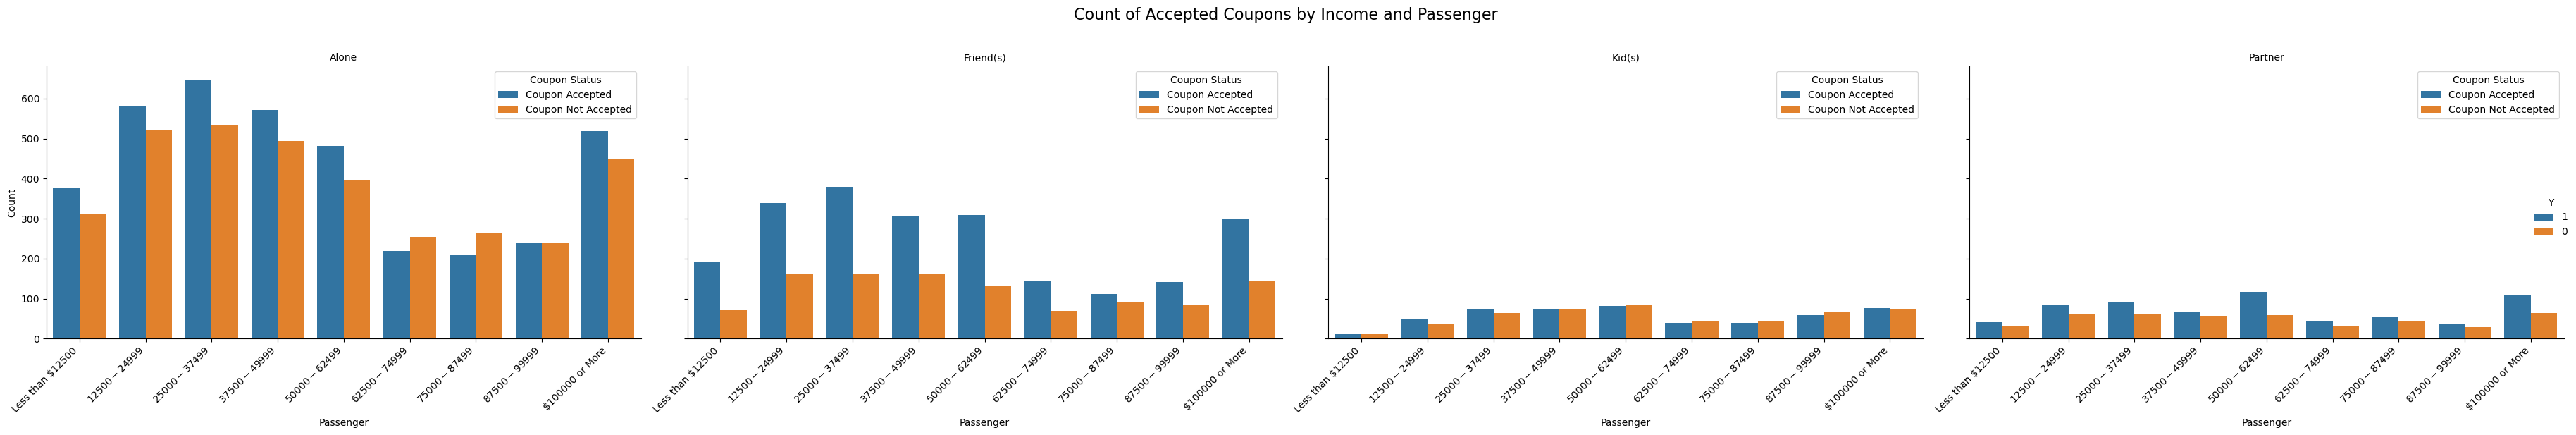

In [90]:
# Create a custom palette and labels for Y
color_palette = {"0": "#ff7f0e", "1": "#1f77b4"}
y_labels = {"1": "Coupon Accepted", "0": "Coupon Not Accepted"}

g = sns.catplot(
    data=income, 
    x="income", 
    hue="Y",
    col="passanger",
    kind="count",
    height=6, 
    aspect=1.5,
    order=income_order,
    palette=color_palette,
    hue_order=["1", "0"]
)

g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle("Count of Accepted Coupons by Income and Passenger", y=1.02, fontsize=16)
g.set_axis_labels("Passenger", "Count")

# Improve the legends
for ax in g.axes.flat:
    ax.legend(title="Coupon Status", labels=[y_labels["1"], y_labels["0"]])

# Adjust the subplot titles
g.set_titles("{col_name}")

# Adjust layout to prevent cutting off labels
plt.tight_layout()

Those travelling with a partner or kids have a significant decreased ratio of accepted to unaccepted than those travelling alone or with a friend.  However, they still exhibit the income curve that we have seen with regards to overall acceptance.

### Conslusions

Overall, income seems to have a consistent curve.  While accepted to unaccepted ratio results are impacted by other factors such as gender and passengers, the accepted curve itself is pretty distinct and relatively unimpacted by other variables.  That is to say the income curve still exists with similar ratios based on income regardless of the ratio of accepted to unaccepted.
That said, the ratio of accepted to unnacepted is much higher for those under 62500 in income or over 100,000.